In [ ]:
!pip install tensorflow

In [ ]:
!pip install librosa

In [ ]:
!pip install ipython

In [7]:
import tensorflow as tf
import numpy as np
import os
import librosa
import matplotlib.pyplot as plt
from collections import Counter
from IPython.display import Audio

# SKEWNESS AND KURTOSIS

## For Time Domain Data

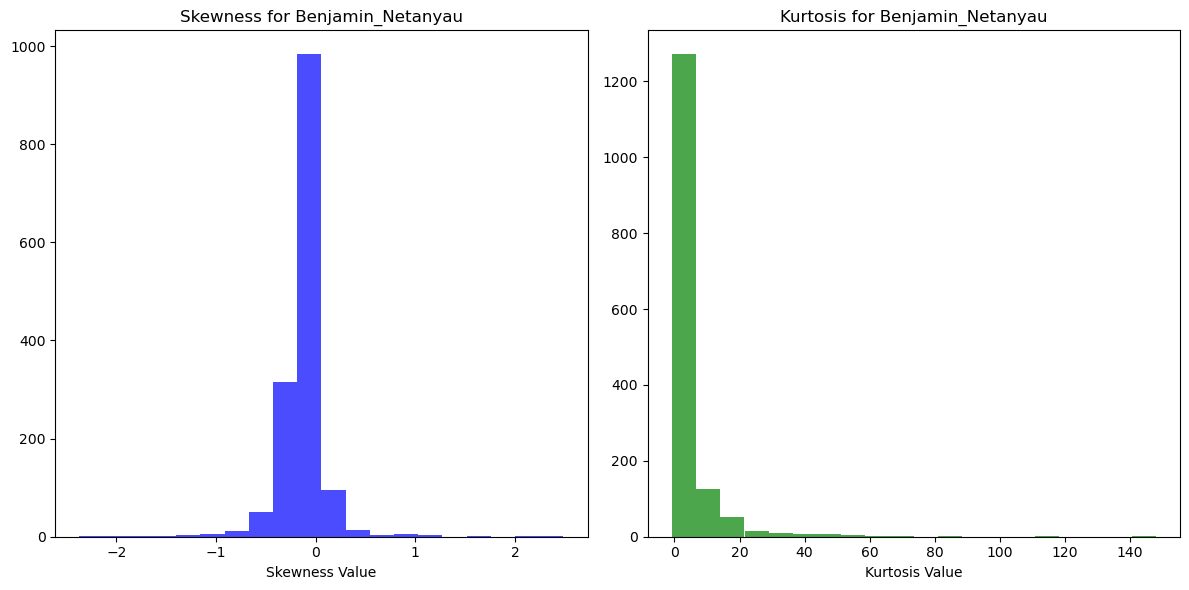

Class: Benjamin_Netanyau
Mean Skewness: -0.10, SD Skewness: 0.25
Mean Kurtosis: 3.78, SD Kurtosis: 9.24



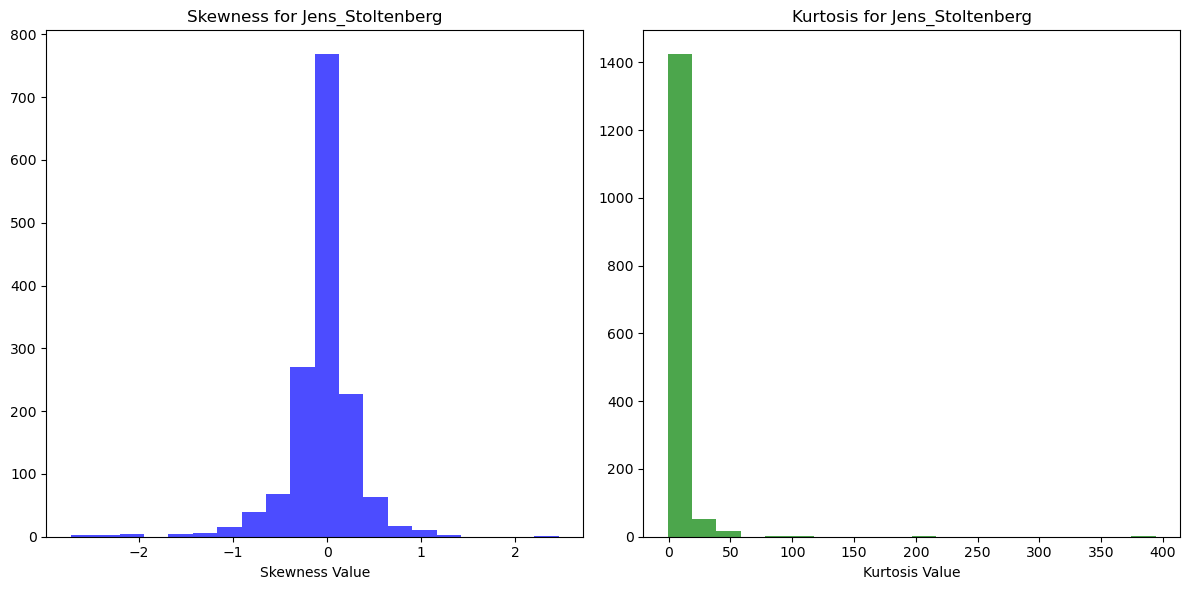

Class: Jens_Stoltenberg
Mean Skewness: -0.05, SD Skewness: 0.36
Mean Kurtosis: 5.50, SD Kurtosis: 15.17



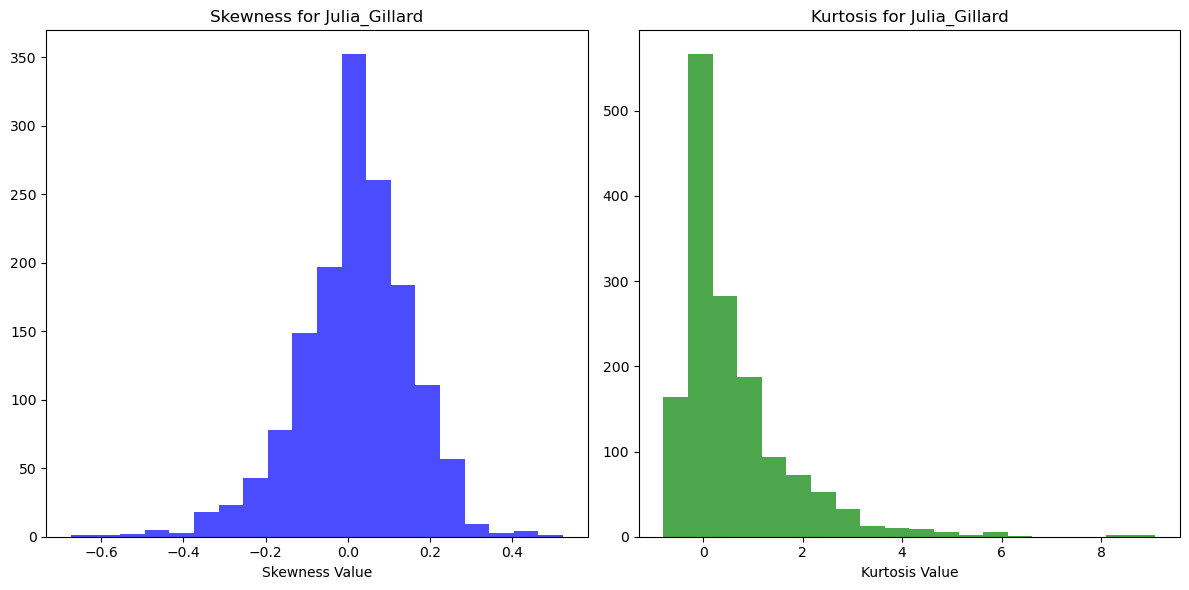

Class: Julia_Gillard
Mean Skewness: 0.02, SD Skewness: 0.14
Mean Kurtosis: 0.59, SD Kurtosis: 1.13



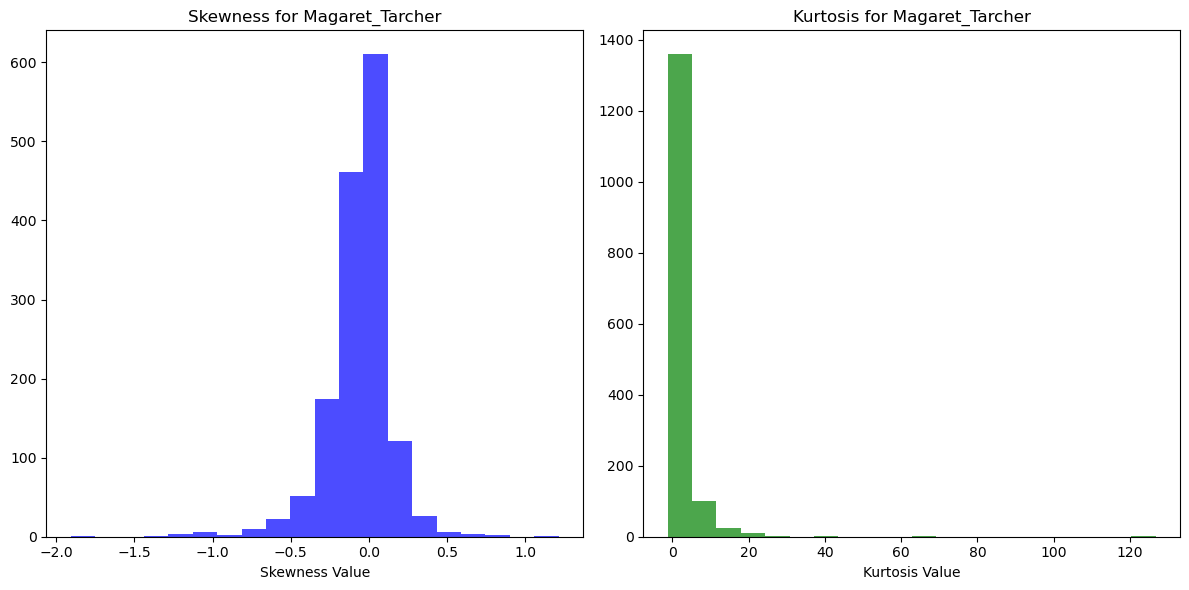

Class: Magaret_Tarcher
Mean Skewness: -0.07, SD Skewness: 0.21
Mean Kurtosis: 1.39, SD Kurtosis: 5.16



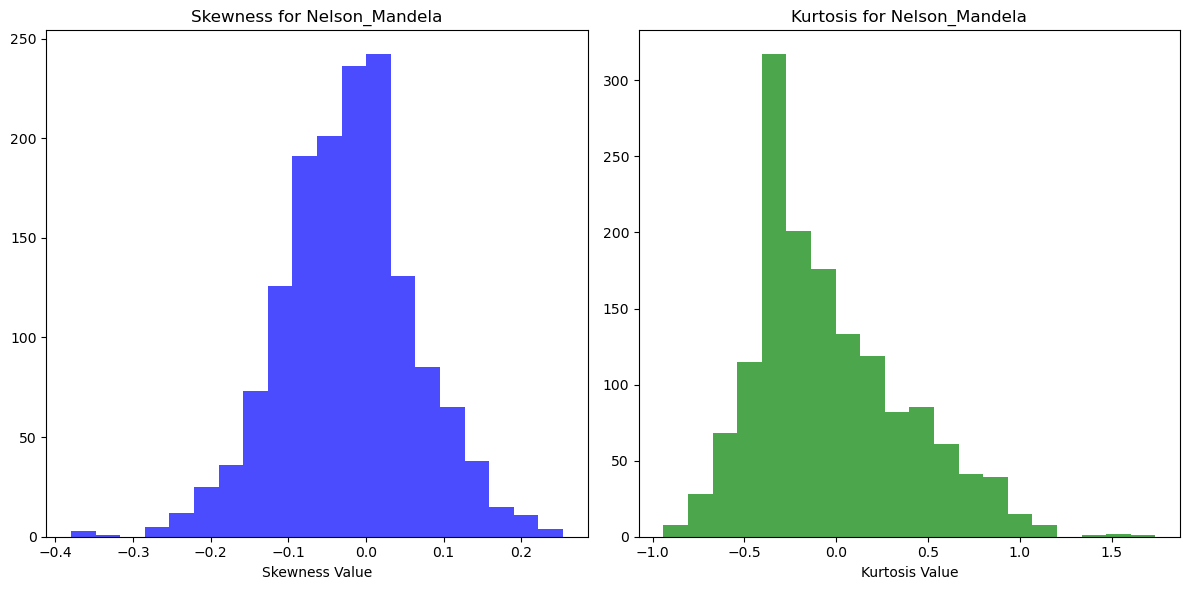

Class: Nelson_Mandela
Mean Skewness: -0.02, SD Skewness: 0.09
Mean Kurtosis: -0.04, SD Kurtosis: 0.41



In [3]:
import os
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from scipy.io import wavfile

# Directory containing the audio files
audio_files_dir = r'..\archive\16000_pcm_speeches'

# Function to calculate skewness and kurtosis for a single audio file
def calculate_skewness_kurtosis(audio_file):
    sample_rate, audio_data = wavfile.read(audio_file)
    audio_data = audio_data.astype(np.float64)

    skewness = scipy.stats.skew(audio_data)
    kurtosis = scipy.stats.kurtosis(audio_data)
    
    return skewness, kurtosis

# Create a dictionary to store skewness and kurtosis values for each class
class_data = {} 

# Iterate through audio files in the directory
for class_name in os.listdir(audio_files_dir):
    if(class_name =="other"):
        break
        
    class_dir = os.path.join(audio_files_dir, class_name)
    
    if os.path.isdir(class_dir):
        class_data[class_name] = []
        
        for audio_file in os.listdir(class_dir):
            if audio_file.endswith('.wav'):
                audio_file_path = os.path.join(class_dir, audio_file)
                skewness, kurtosis = calculate_skewness_kurtosis(audio_file_path)
                class_data[class_name].append((skewness, kurtosis))

class_statistics={}
# Plot skewness and kurtosis for each class
for class_name, data in class_data.items():
    skewness_values, kurtosis_values = zip(*data)
    mean_skewness = np.mean(skewness_values)
    sd_skewness = np.std(skewness_values)
    mean_kurtosis = np.mean(kurtosis_values)
    sd_kurtosis = np.std(kurtosis_values)
    class_statistics[class_name] = (mean_skewness, sd_skewness, mean_kurtosis, sd_kurtosis)
    
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(skewness_values, bins=20, color='blue', alpha=0.7)
    plt.title(f'Skewness for {class_name}')
    plt.xlabel('Skewness Value')

    plt.subplot(1, 2, 2)
    plt.hist(kurtosis_values, bins=20, color='green', alpha=0.7)
    plt.title(f'Kurtosis for {class_name}')
    plt.xlabel('Kurtosis Value')

    plt.tight_layout()
    plt.show()
    mean_skewness, sd_skewness, mean_kurtosis, sd_kurtosis = class_statistics[class_name]
    print(f'Class: {class_name}')
    print(f'Mean Skewness: {mean_skewness:.2f}, SD Skewness: {sd_skewness:.2f}')
    print(f'Mean Kurtosis: {mean_kurtosis:.2f}, SD Kurtosis: {sd_kurtosis:.2f}')
    print()

## For Frequency Domain Data

In [ ]:
import os
import numpy as np
import scipy.stats
import matplotlib.pyplot as plt
from scipy.io import wavfile
from scipy.signal import spectrogram

# Directory containing the audio files
audio_files_dir = r'..\archive\16000_pcm_speeches'

# Function to calculate skewness and kurtosis for a single audio file
def calculate_skewness_kurtosis(audio_file):
    sample_rate, audio_data = wavfile.read(audio_file)

    # Calculate the spectrogram
    f, t, Sxx = spectrogram(audio_data, fs=sample_rate)

    # Convert the spectrogram to a 1D array for analysis
    spectrogram_data = Sxx.flatten()

    # Calculate skewness and kurtosis
    skewness = scipy.stats.skew(spectrogram_data)
    kurtosis = scipy.stats.kurtosis(spectrogram_data)
    
    return skewness, kurtosis

# Create a dictionary to store skewness and kurtosis values for each class
class_data = {}  # {class_name: [(skewness1, kurtosis1), (skewness2, kurtosis2), ...]}

# Iterate through audio files in the directory
for class_name in os.listdir(audio_files_dir):
    if(class_name =="other"):
        break
        
    class_dir = os.path.join(audio_files_dir, class_name)
    
    if os.path.isdir(class_dir):
        class_data[class_name] = []
        
        for audio_file in os.listdir(class_dir):
            if audio_file.endswith('.wav'):
                audio_file_path = os.path.join(class_dir, audio_file)
                skewness, kurtosis = calculate_skewness_kurtosis(audio_file_path)
                class_data[class_name].append((skewness, kurtosis))

class_statistics = {}
# Plot skewness and kurtosis for each class
for class_name, data in class_data.items():
    skewness_values, kurtosis_values = zip(*data)
    mean_skewness = np.mean(skewness_values)
    sd_skewness = np.std(skewness_values)
    mean_kurtosis = np.mean(kurtosis_values)
    sd_kurtosis = np.std(kurtosis_values)
    class_statistics[class_name] = (mean_skewness, sd_skewness, mean_kurtosis, sd_kurtosis)
    
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(skewness_values, bins=20, color='blue', alpha=0.7)
    plt.title(f'Skewness for {class_name}')
    plt.xlabel('Skewness Value')

    plt.subplot(1, 2, 2)
    plt.hist(kurtosis_values, bins=20, color='green', alpha=0.7)
    plt.title(f'Kurtosis for {class_name}')
    plt.xlabel('Kurtosis Value')

    plt.tight_layout()
    plt.show()
    mean_skewness, sd_skewness, mean_kurtosis, sd_kurtosis = class_statistics[class_name]
    print(f'Class: {class_name}')
    print(f'Mean Skewness: {mean_skewness:.2f}, SD Skewness: {sd_skewness:.2f}')
    print(f'Mean Kurtosis: {mean_kurtosis:.2f}, SD Kurtosis: {sd_kurtosis:.2f}')
    print()

# Statistical Analysis - MEAN & SD - TIME SERIES DATA

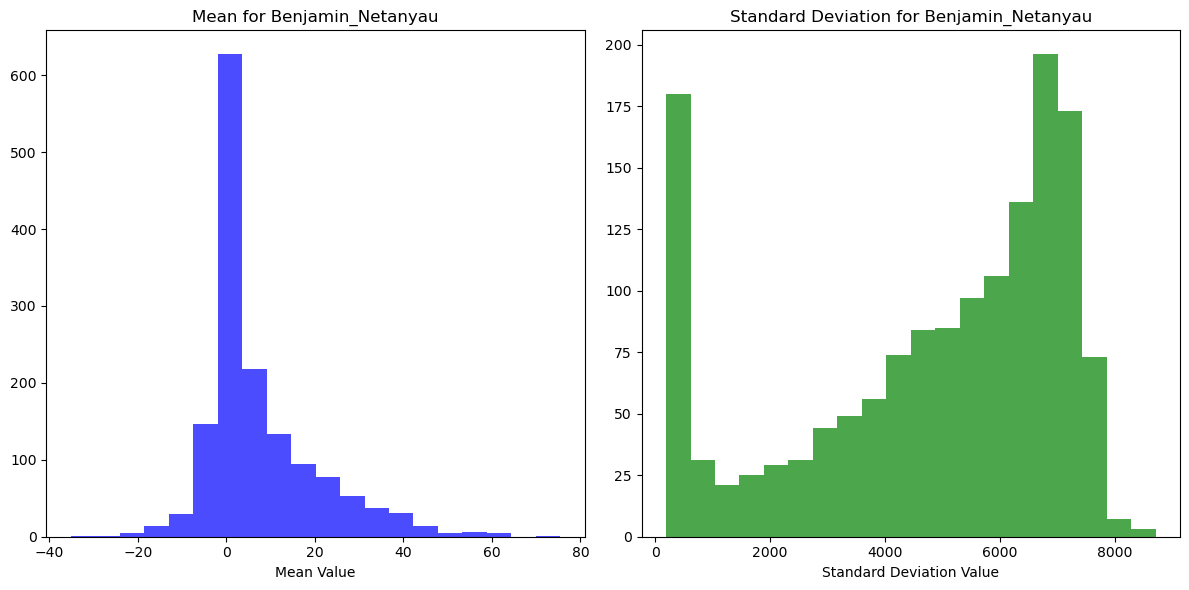

Class: Benjamin_Netanyau
Mean : 7.16
Average SD : 4791.46



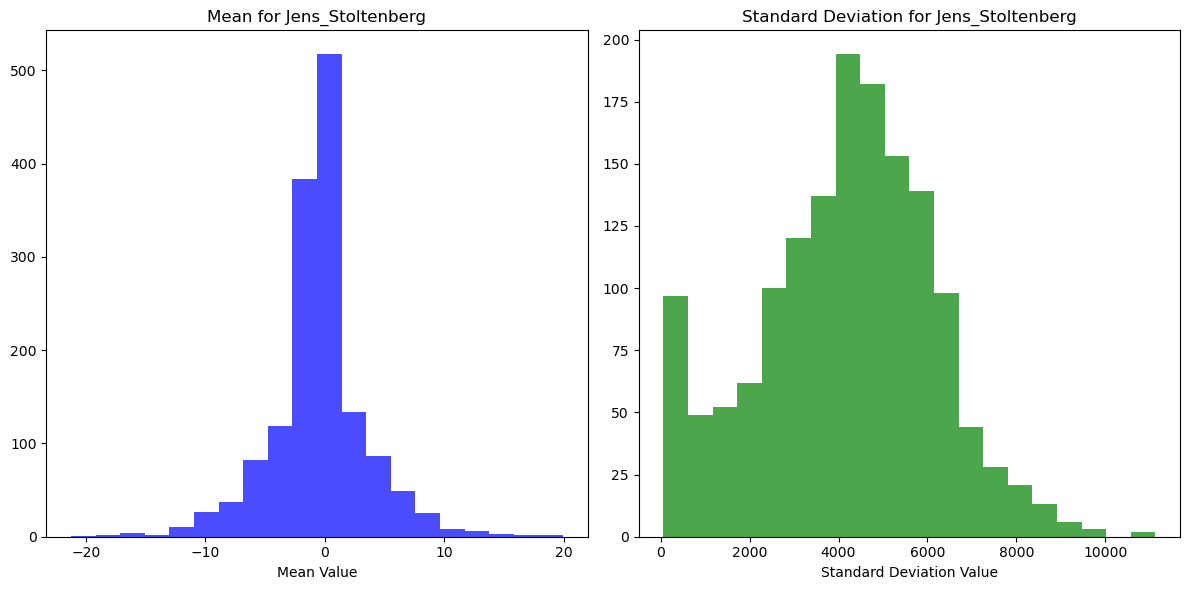

Class: Jens_Stoltenberg
Mean : -0.47
Average SD : 4152.42



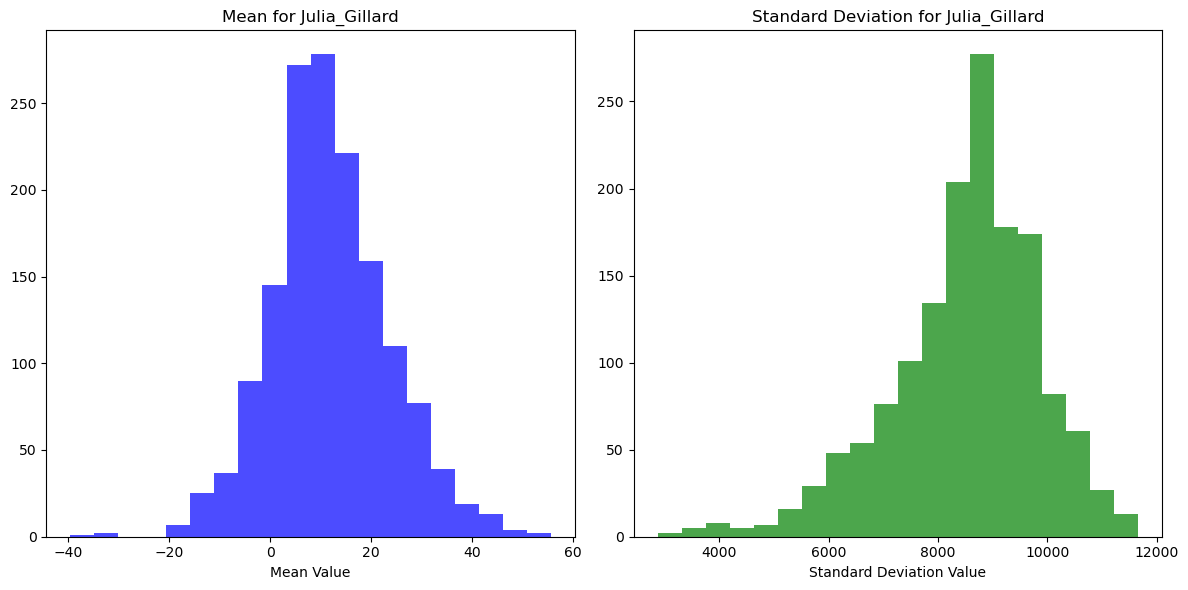

Class: Julia_Gillard
Mean : 11.80
Average SD : 8499.36



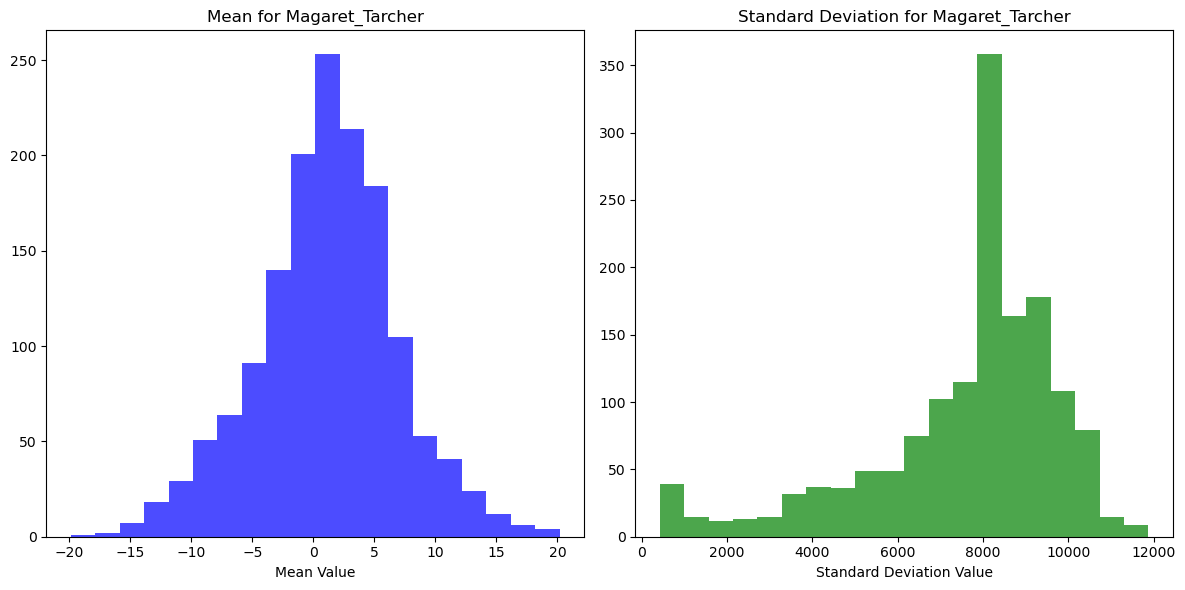

Class: Magaret_Tarcher
Mean : 1.12
Average SD : 7560.32



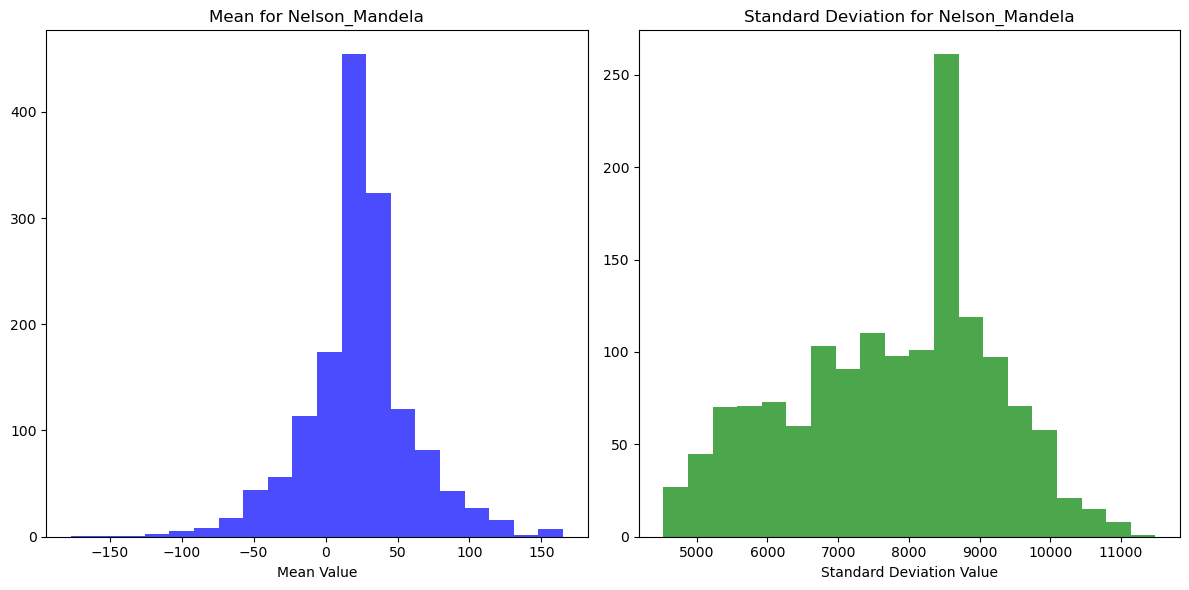

Class: Nelson_Mandela
Mean : 23.32
Average SD : 7765.39



In [83]:
audio_files_dir = r'..\archive\16000_pcm_speeches'

# Function to calculate mean and standard deviation for a single audio file
def calculate_mean_sd(audio_file):
    sample_rate, audio_data = wavfile.read(audio_file)
    
    # Calculate mean and standard deviation
    mean = np.mean(audio_data)
    sd = np.std(audio_data)
    
    return mean, sd

# Create dictionaries to store mean and standard deviation values for each class
class_means = {}  # {class_name: [mean1, mean2, ...]}
class_sds = {}    # {class_name: [sd1, sd2, ...]}

# Iterate through audio files in the directory
for class_name in os.listdir(audio_files_dir):
    if(class_name =="other"):
        break
    class_dir = os.path.join(audio_files_dir, class_name)
    
    if os.path.isdir(class_dir):
        class_means[class_name] = []
        class_sds[class_name] = []
        
        for audio_file in os.listdir(class_dir):
            if audio_file.endswith('.wav'):
                audio_file_path = os.path.join(class_dir, audio_file)
                mean, sd = calculate_mean_sd(audio_file_path)
                class_means[class_name].append(mean)
                class_sds[class_name].append(sd)

# Plot the means and standard deviations for each class
for class_name in class_means.keys():
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.hist(class_means[class_name], bins=20, color='blue', alpha=0.7)
    plt.title(f'Mean for {class_name}')
    plt.xlabel('Mean Value')

    plt.subplot(1, 2, 2)
    plt.hist(class_sds[class_name], bins=20, color='green', alpha=0.7)
    plt.title(f'Standard Deviation for {class_name}')
    plt.xlabel('Standard Deviation Value')

    plt.tight_layout()
    plt.show()
    mean = np.mean(class_means[class_name])
    sd = np.mean(class_sds[class_name])
    print(f'Class: {class_name}')
    print(f'Mean : {mean:.2f}')
    print(f'Average SD : {sd:.2f}')
    print()

# CHECK FOR CLASS IMBALANCE

['Benjamin_Netanyau', 'Jens_Stoltenberg', 'Julia_Gillard', 'Magaret_Tarcher', 'Nelson_Mandela']
[1500, 1500, 1501, 1500, 1500]


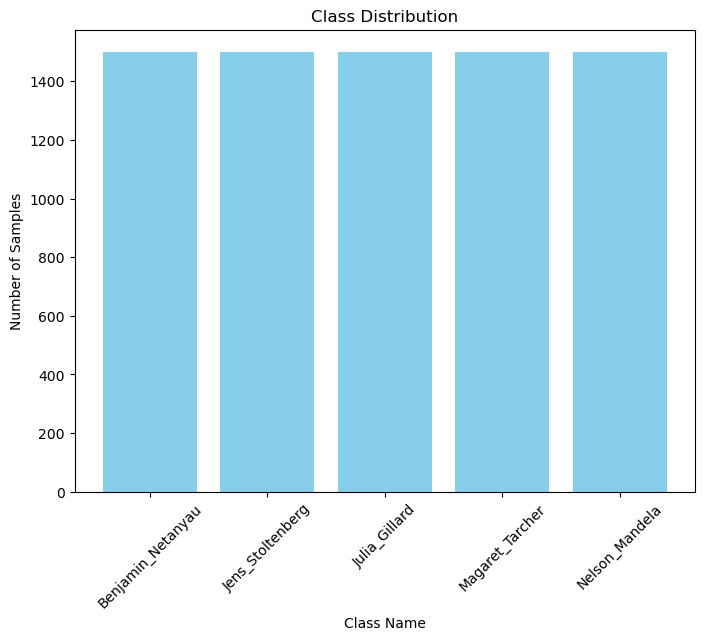

In [87]:
audio_files_dir = r'..\archive\16000_pcm_speeches'

# Create a dictionary to store the count of samples in each class
class_counts = {}

# Iterate through audio files in the directory
for class_name in os.listdir(audio_files_dir):
    if(class_name =="other"):
        break
        
    class_dir = os.path.join(audio_files_dir, class_name)
    if os.path.isdir(class_dir):
        class_counts[class_name] = 0
        
        for audio_file in os.listdir(class_dir):
            if audio_file.endswith('.wav'):
                class_counts[class_name] += 1

# Plot the class distribution
class_names = list(class_counts.keys())
class_sample_counts = [class_counts[class_name] for class_name in class_names]

print(class_names)
print(class_sample_counts)

plt.figure(figsize=(8, 6))
plt.bar(class_names, class_sample_counts, color='skyblue')
plt.xlabel('Class Name')
plt.ylabel('Number of Samples')
plt.title('Class Distribution')
plt.xticks(rotation=45)
plt.show()

# Amplitude Envelope

In [192]:
audio_file_benjamin_1 = r'..\archive\16000_pcm_speeches\Benjamin_Netanyau\10.wav'# Replace with the path to your audio file
audio_file_benjamin_2 = r'..\archive\16000_pcm_speeches\Benjamin_Netanyau\22.wav'  
audio_file_benjamin_3 = r'..\archive\16000_pcm_speeches\Benjamin_Netanyau\25.wav'  

audio_file_magaret_1 = r'..\archive\16000_pcm_speeches\Magaret_Tarcher\15.wav'  
audio_file_magaret_2 = r'..\archive\16000_pcm_speeches\Magaret_Tarcher\18.wav'  
audio_file_magaret_3 = r'..\archive\16000_pcm_speeches\Magaret_Tarcher\20.wav'  
Audio(audio_file_magaret_1)

In [199]:
audio_benjamin = [audio_file_benjamin_1,audio_file_benjamin_2,audio_file_benjamin_3]
audio_magaret = [audio_file_magaret_1,audio_file_magaret_2,audio_file_magaret_3]

In [200]:
a  = (1/sr)
print(f"duration is {a:.6f}")

duration is 0.000045


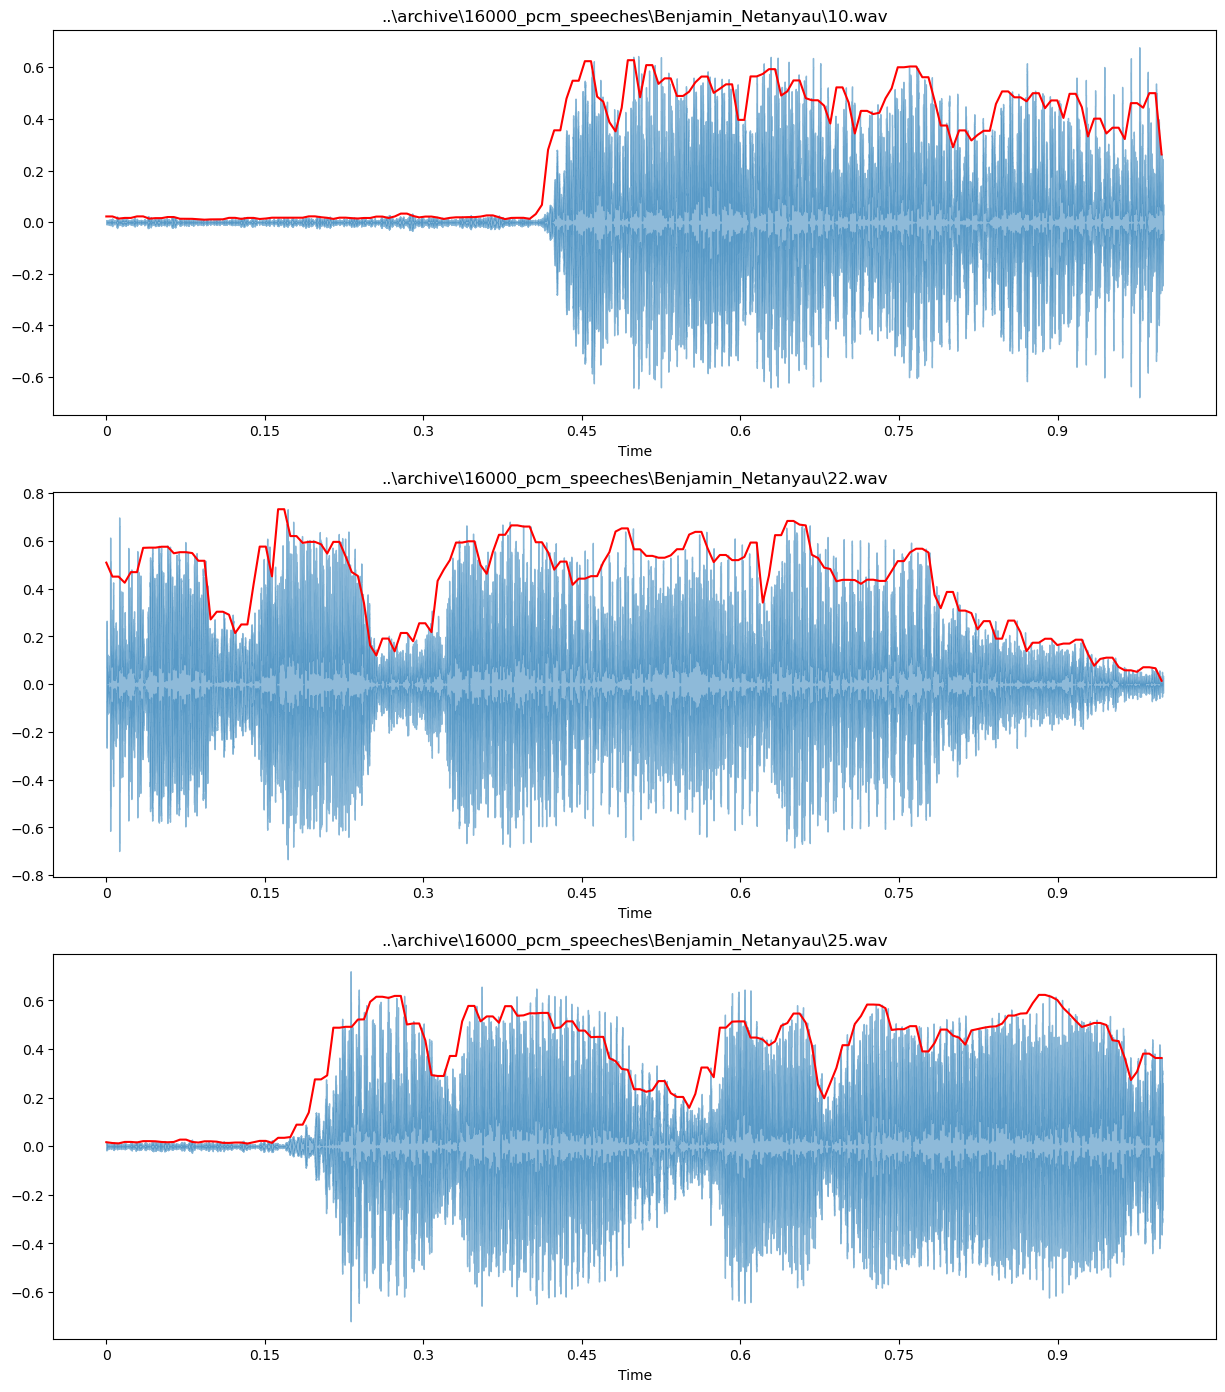

In [204]:
def amplitude_envelope(sig,frame_len,hop_len):
    envelope = []
    for i in range(0,len(sig),hop_len):
        max_amp_current = max(sig[i:i+frame_len])
        envelope.append(max_amp_current)
    return envelope

frame_size = 256
hop = 128

plt.figure(figsize=(15,17))
for i,file in enumerate(audio_benjamin):
    y,sr = librosa.load(file)
    ampli_env  = amplitude_envelope(y,frame_size,hop)

    total_frames = range(0,len(ampli_env))
    t = librosa.frames_to_time(total_frames,hop_length = hop)

    # visualizing 
    plt.subplot(3,1,i+1)
    librosa.display.waveshow(y,sr=sr,alpha=0.5)
    plt.plot(t,ampli_env,color="r")
    plt.title(audio_benjamin[i])

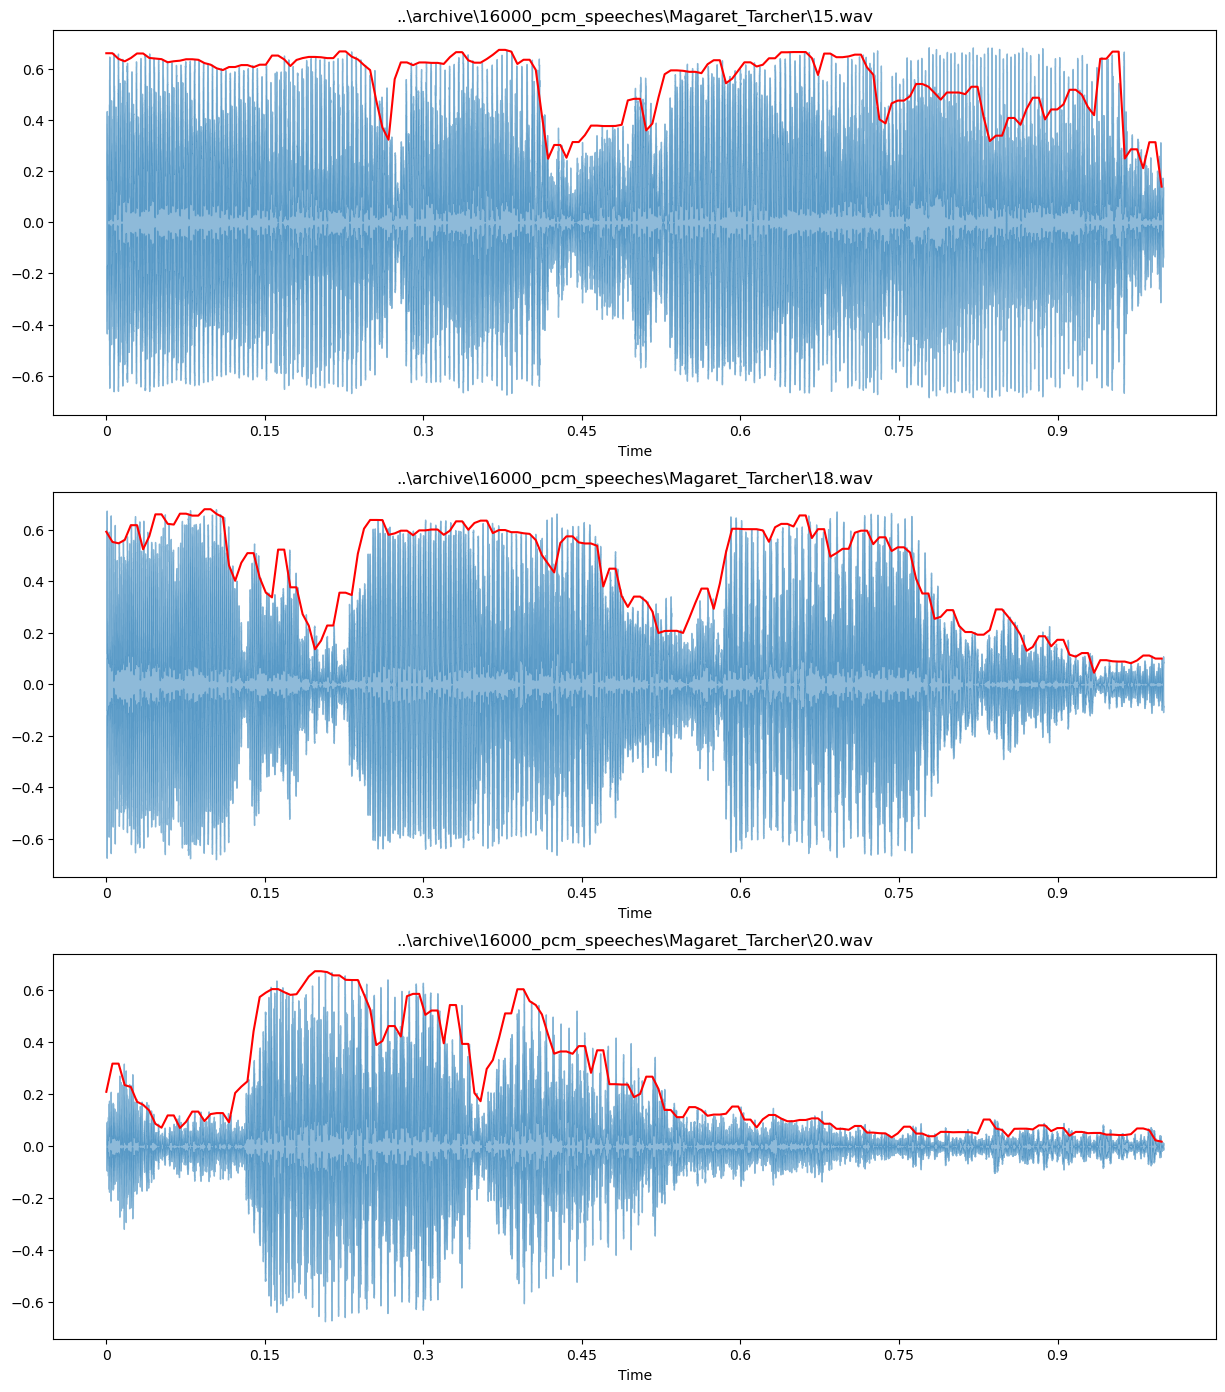

In [205]:
def amplitude_envelope(sig,frame_len,hop_len):
    envelope = []
    for i in range(0,len(sig),hop_len):
        max_amp_current = max(sig[i:i+frame_len])
        envelope.append(max_amp_current)
    return envelope

frame_size = 256
hop = 128

plt.figure(figsize=(15,17))
for i,file in enumerate(audio_magaret):
    y,sr = librosa.load(file)
    ampli_env  = amplitude_envelope(y,frame_size,hop)

    total_frames = range(0,len(ampli_env))
    t = librosa.frames_to_time(total_frames,hop_length = hop)

    # visualizing 
    plt.subplot(3,1,i+1)
    librosa.display.waveshow(y,sr=sr,alpha=0.5)
    plt.plot(t,ampli_env,color="r")
    plt.title(audio_magaret[i])

# RMS Energy

In [207]:
audio_file_benjamin_1 = r'..\archive\16000_pcm_speeches\Benjamin_Netanyau\10.wav'# Replace with the path to your audio file
audio_file_benjamin_2 = r'..\archive\16000_pcm_speeches\Benjamin_Netanyau\22.wav'  
audio_file_benjamin_3 = r'..\archive\16000_pcm_speeches\Benjamin_Netanyau\25.wav'  

audio_file_magaret_1 = r'..\archive\16000_pcm_speeches\Magaret_Tarcher\15.wav'  
audio_file_magaret_2 = r'..\archive\16000_pcm_speeches\Magaret_Tarcher\18.wav'  
audio_file_magaret_3 = r'..\archive\16000_pcm_speeches\Magaret_Tarcher\20.wav'  

audio_benjamin = [audio_file_benjamin_1,audio_file_benjamin_2,audio_file_benjamin_3]
audio_magaret = [audio_file_magaret_1,audio_file_magaret_2,audio_file_magaret_3]

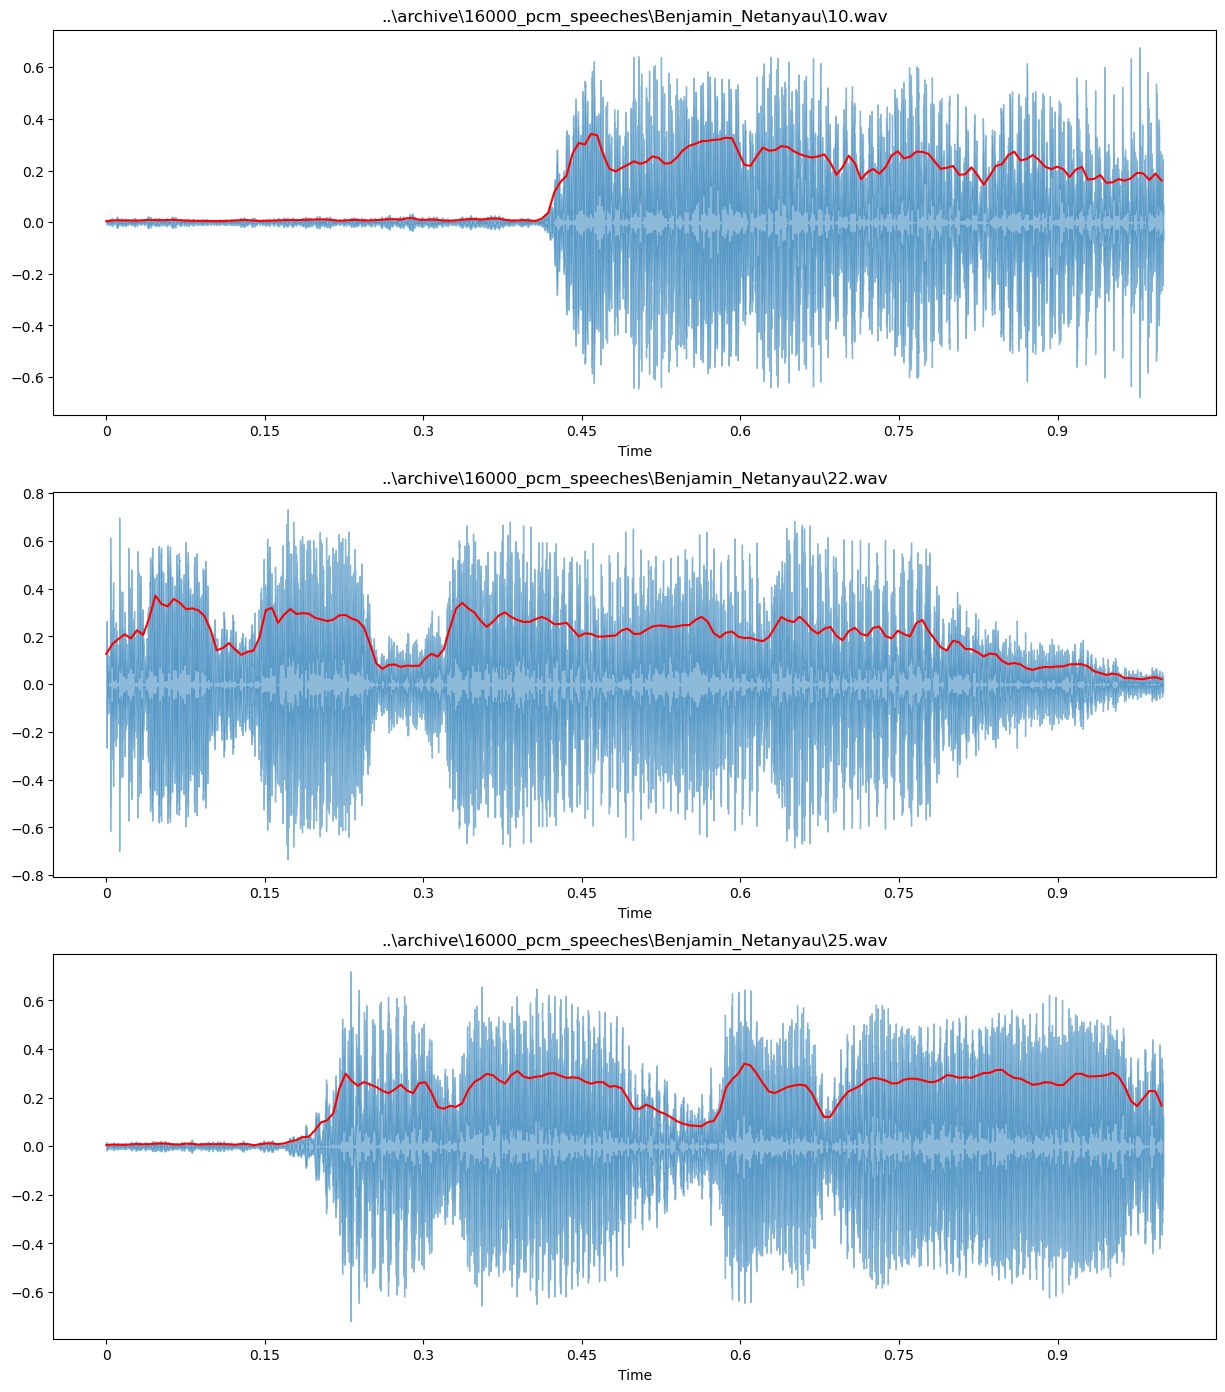

In [222]:
frame_size = 256
hop = 128

plt.figure(figsize=(15,17))
for i,file in enumerate(audio_benjamin):
    y,sr = librosa.load(file)
    rms_ = librosa.feature.rms(y=y,frame_length=frame_size,hop_length=hop)[0]
    
    total_frames = range(0,len(rms_))
    t = librosa.frames_to_time(total_frames,hop_length = hop)
    
    # visualizing 
    plt.subplot(3,1,i+1)
    librosa.display.waveshow(y,sr=sr,alpha=0.5)
    plt.plot(t,rms_,color="r")
    plt.title(audio_benjamin[i])

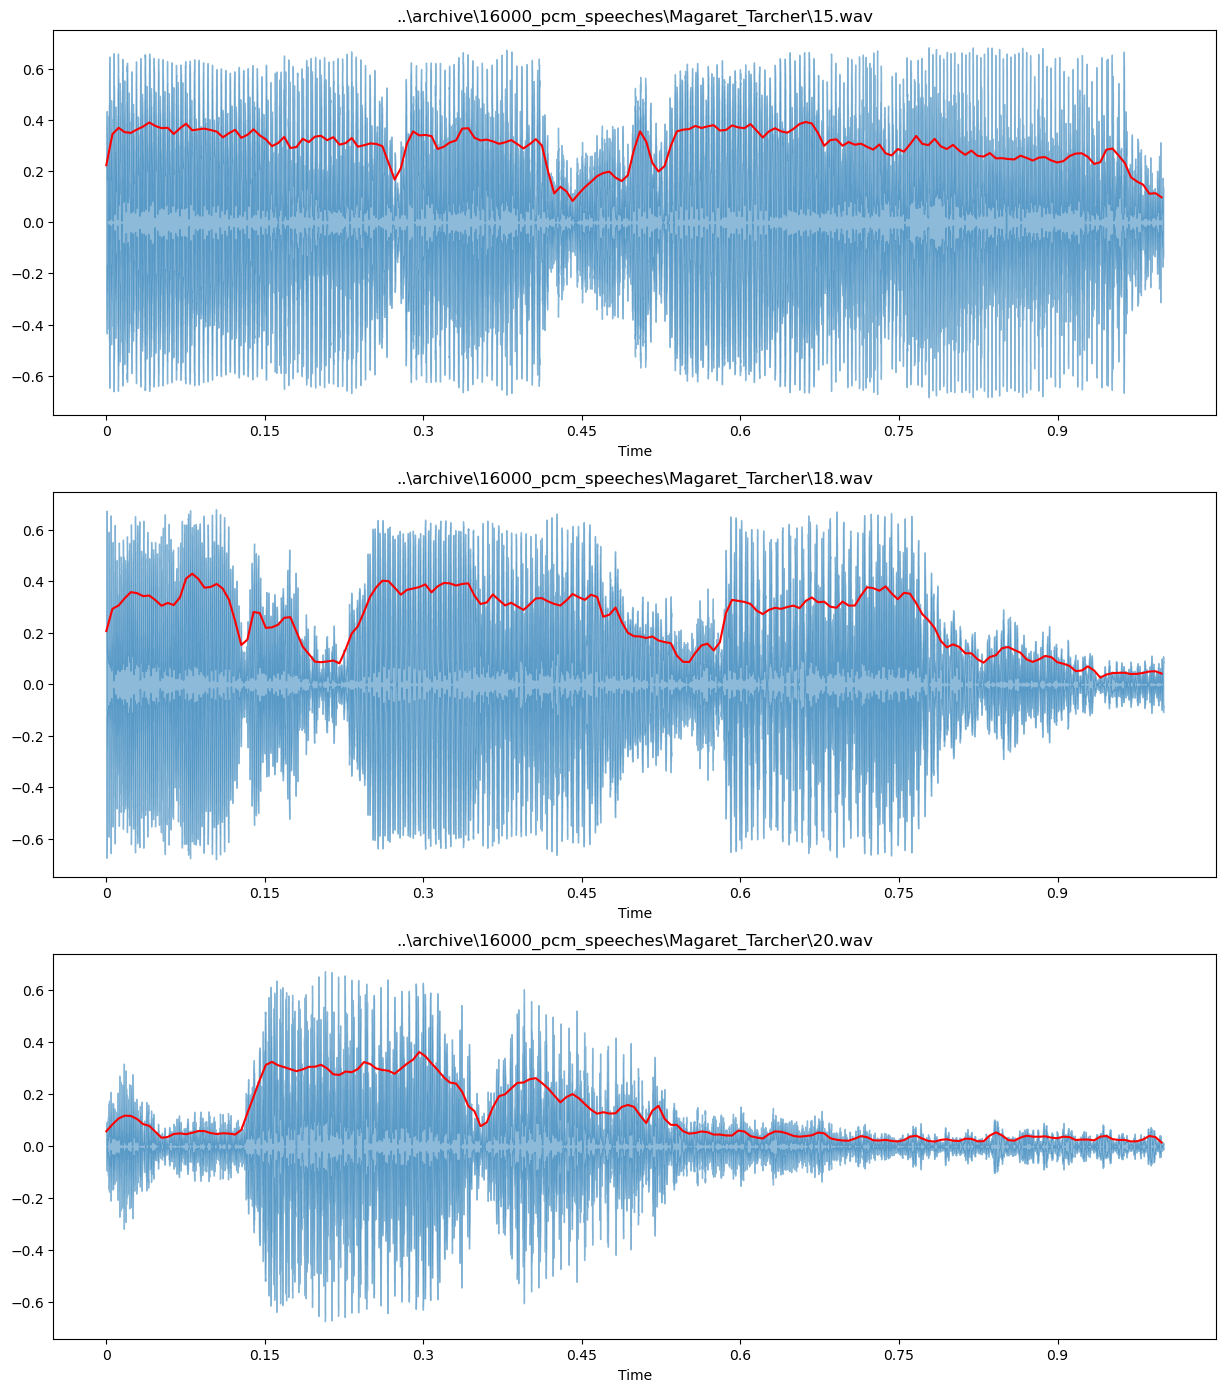

In [221]:
frame_size = 256
hop = 128

plt.figure(figsize=(15,17))
for i,file in enumerate(audio_magaret):
    y,sr = librosa.load(file)
    rms_ = librosa.feature.rms(y=y,frame_length=frame_size,hop_length=hop)[0]
    
    total_frames = range(0,len(rms_))
    t = librosa.frames_to_time(total_frames,hop_length = hop)
    
    # visualizing 
    plt.subplot(3,1,i+1)
    librosa.display.waveshow(y,sr=sr,alpha=0.5)
    plt.plot(t,rms_,color="r")
    plt.title(audio_magaret[i])

# Spectogram

In [239]:
audio_file_1 = r'..\archive\16000_pcm_speeches\Benjamin_Netanyau\10.wav'
audio_file_2 = r'..\archive\16000_pcm_speeches\Jens_Stoltenberg\20.wav'  
audio_file_3 = r'..\archive\16000_pcm_speeches\Julia_Gillard\25.wav'  
audio_file_4 = r'..\archive\16000_pcm_speeches\Magaret_Tarcher\15.wav'  
audio_file_5 = r'..\archive\16000_pcm_speeches\Nelson_Mandela\18.wav' 

audios = [audio_file_1,audio_file_2,audio_file_3,audio_file_4,audio_file_5]


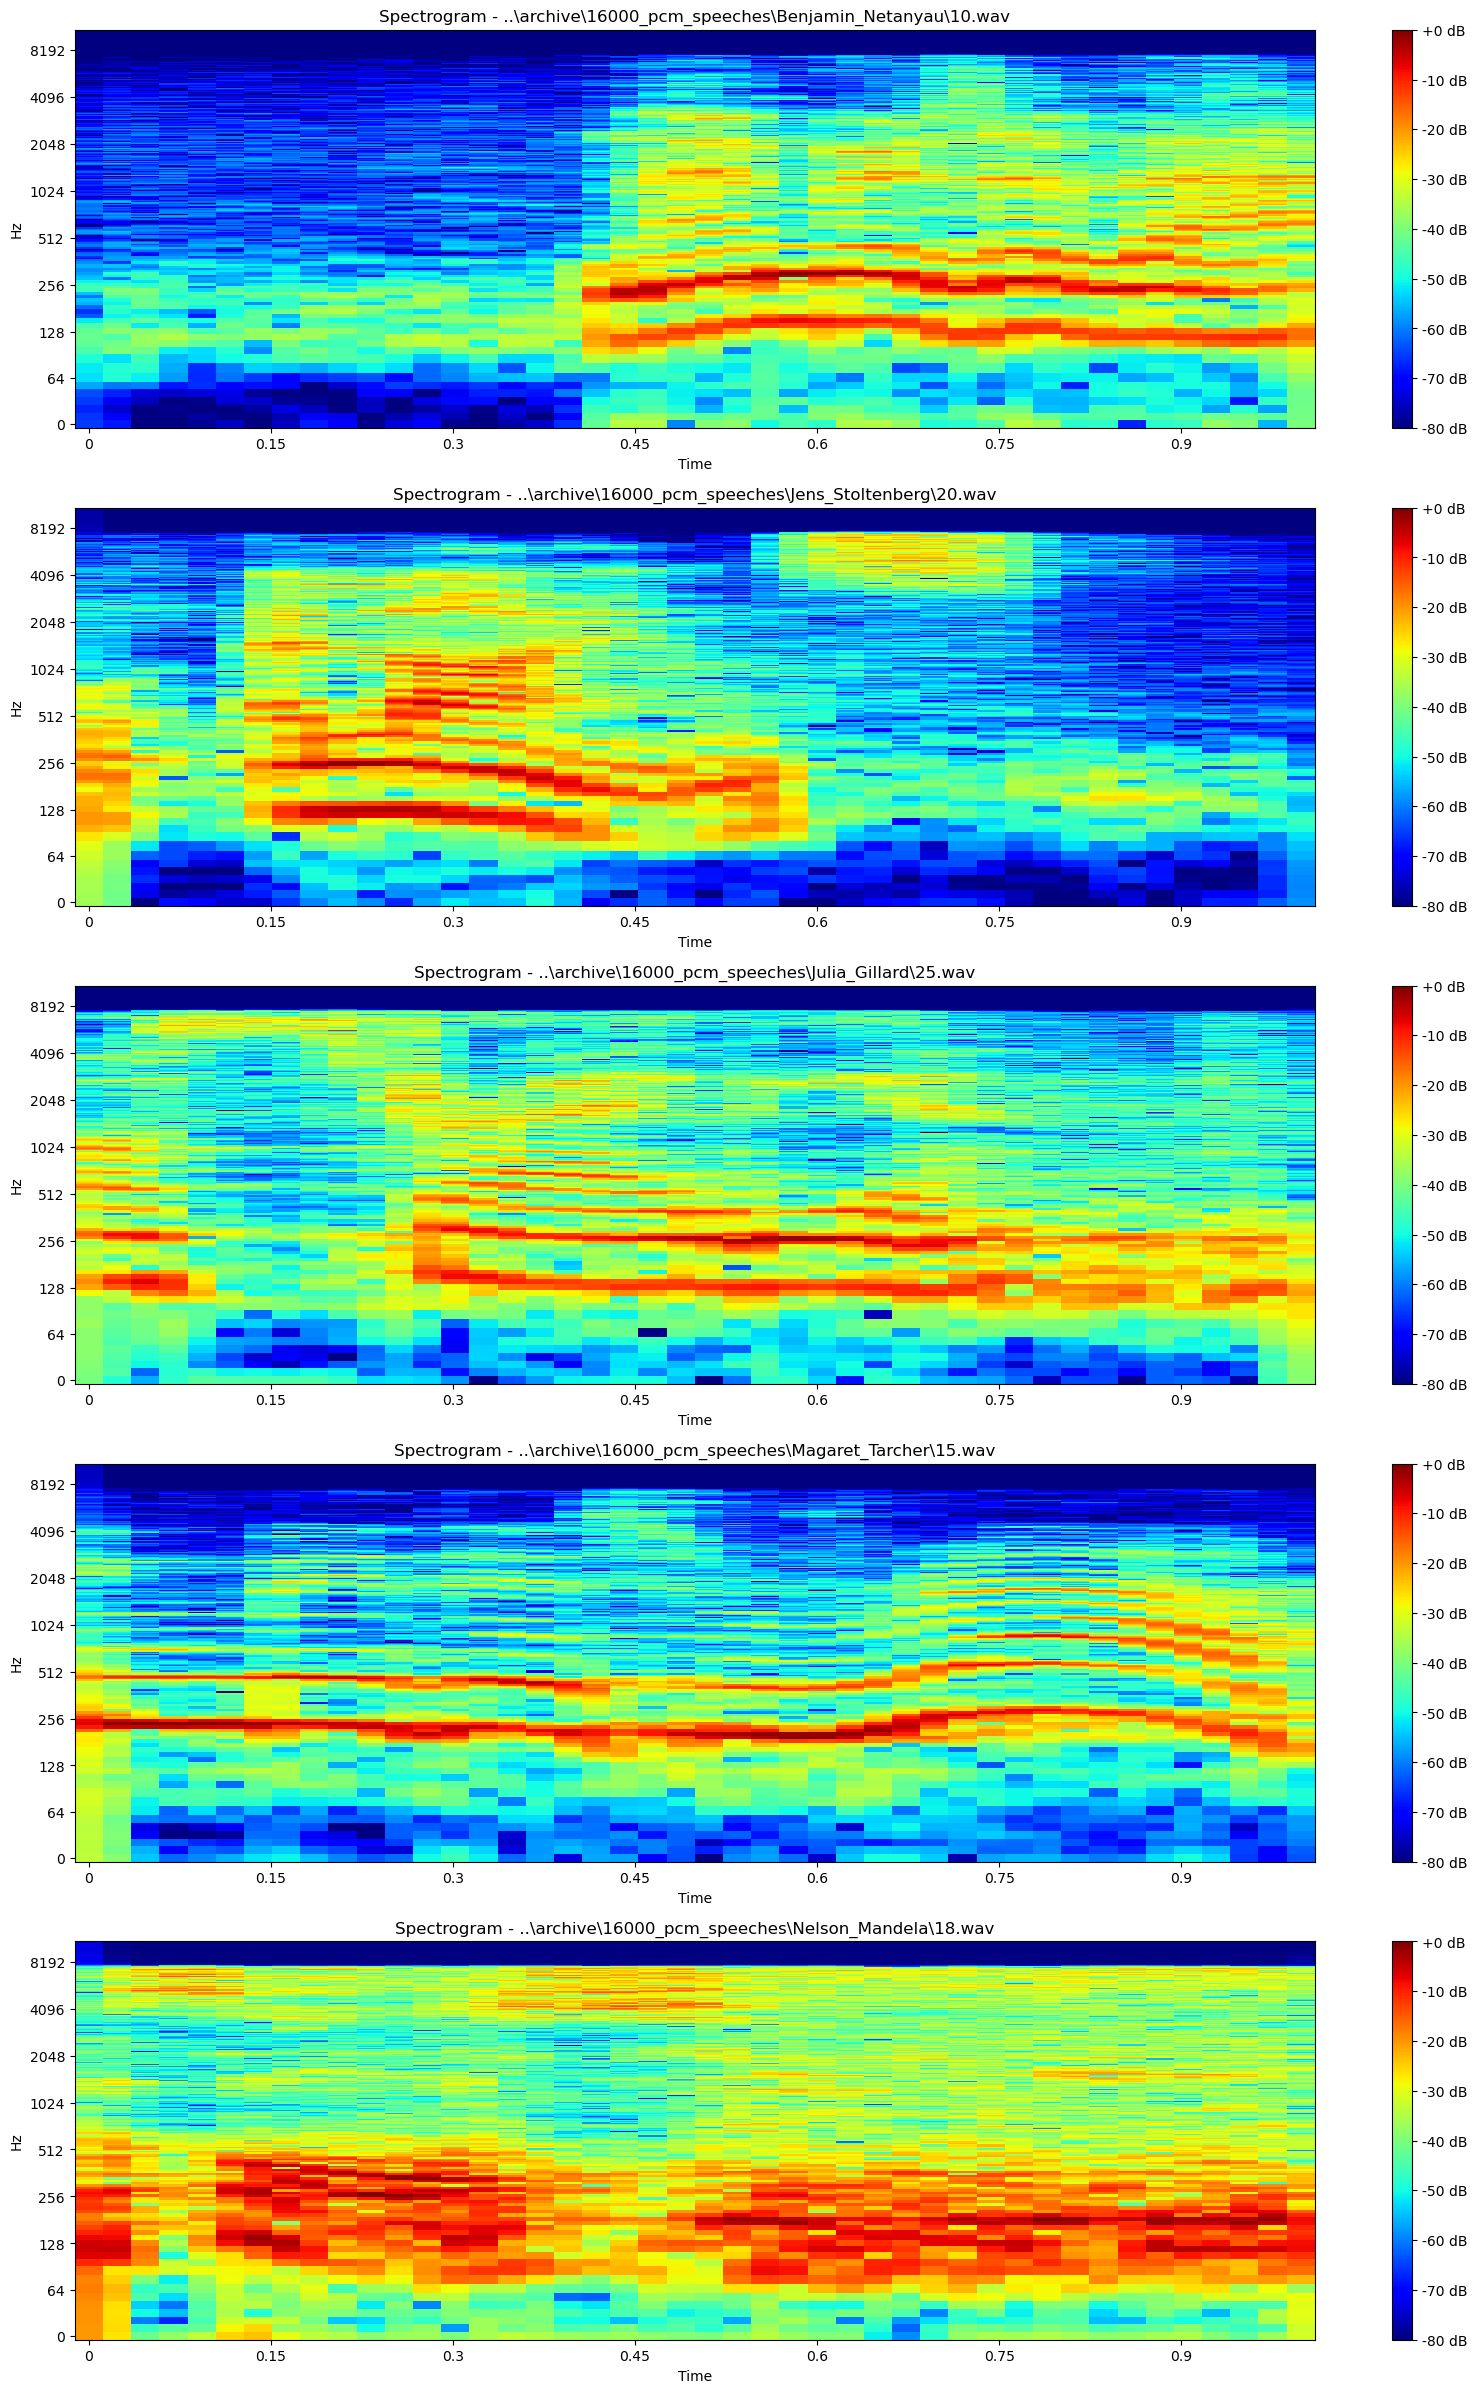

In [240]:
plt.figure(figsize = (20,30))
for i,item in enumerate(audios):
    y, sr = librosa.load(item)
    plt.subplot(5,1,i+1)
    D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
    librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log',cmap='jet')
    plt.colorbar(format='%+2.0f dB')
    plt.title('Spectrogram - '+str(item))
    
plt.show()


# mel - spectogram

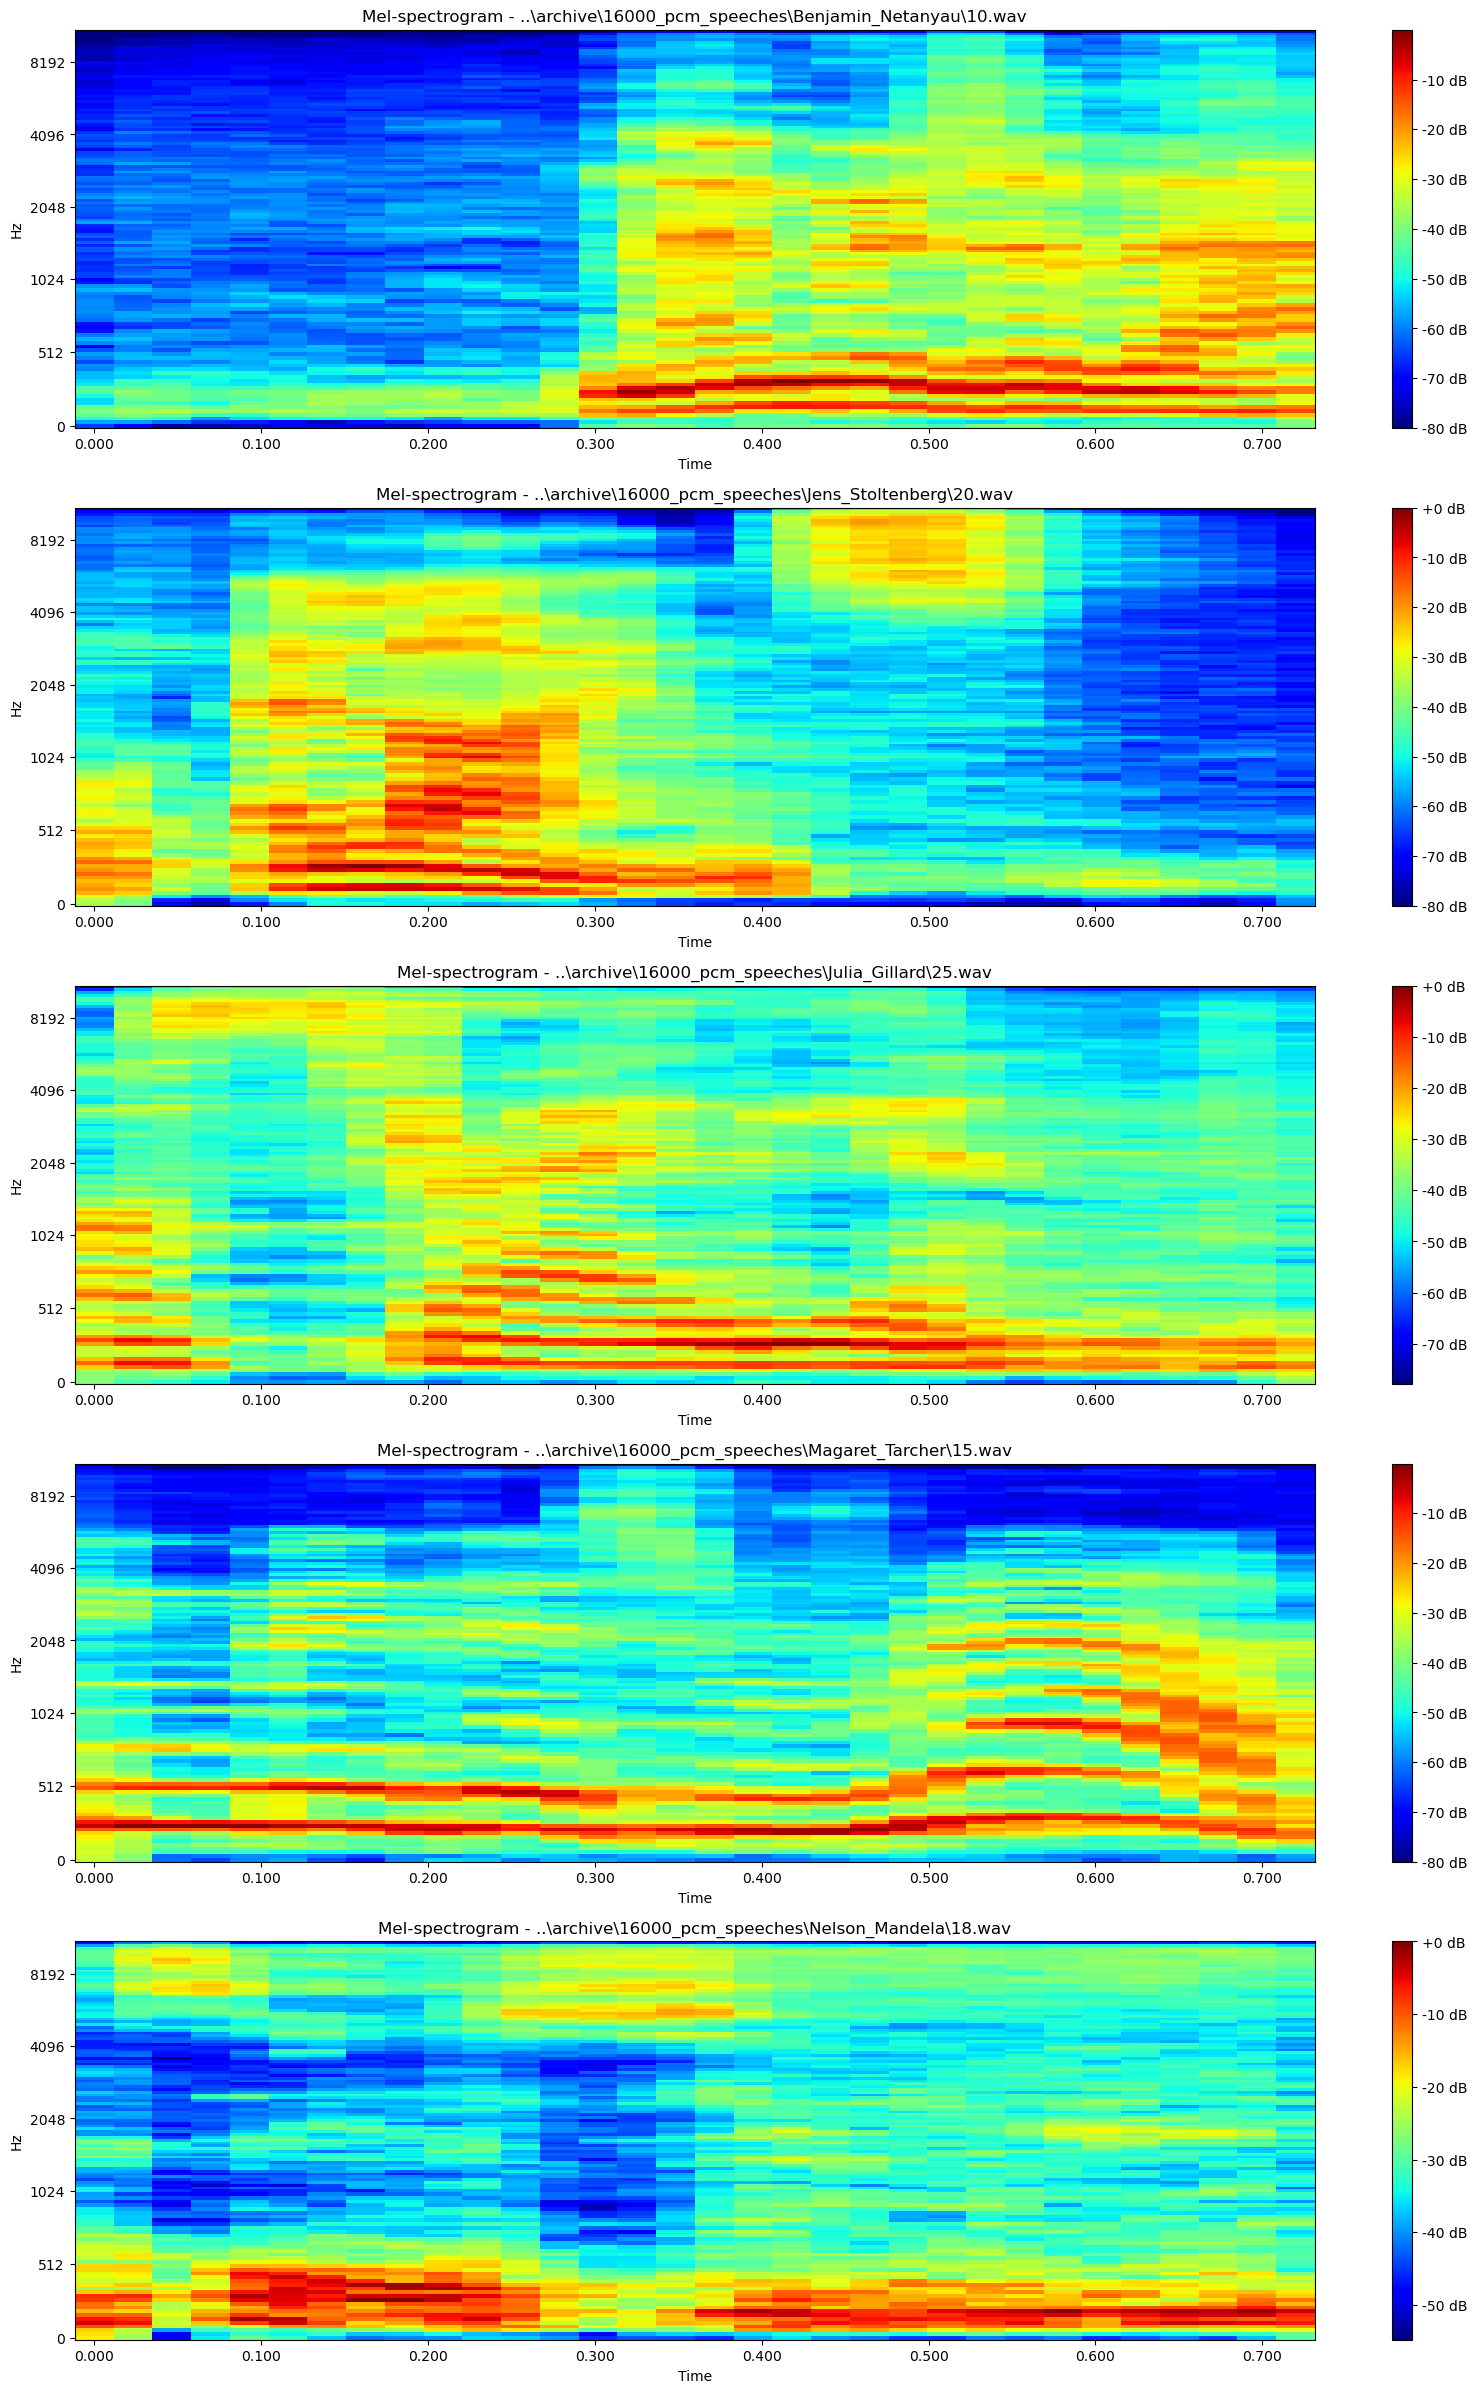

In [241]:
plt.figure(figsize = (20,30))
for i,item in enumerate(audios):
    y, sr = librosa.load(item,sr = None)
    plt.subplot(5,1,i+1)
    
    mel_spectrogram = librosa.feature.melspectrogram(y=y, sr=sr)
    mel_spectrogram_db = librosa.power_to_db(mel_spectrogram, ref=np.max)
    librosa.display.specshow(mel_spectrogram_db, x_axis='time', y_axis='mel',cmap='jet')
    plt.title('Mel-spectrogram - '+str(item))
    plt.colorbar(format='%+2.0f dB')
    
#     D = librosa.amplitude_to_db(np.abs(librosa.stft(y)), ref=np.max)
#     librosa.display.specshow(D, sr=sr, x_axis='time', y_axis='log',cmap='jet')
#     plt.colorbar(format='%+2.0f dB')
#     plt.title('Spectrogram - '+str(item))
    
plt.show()
